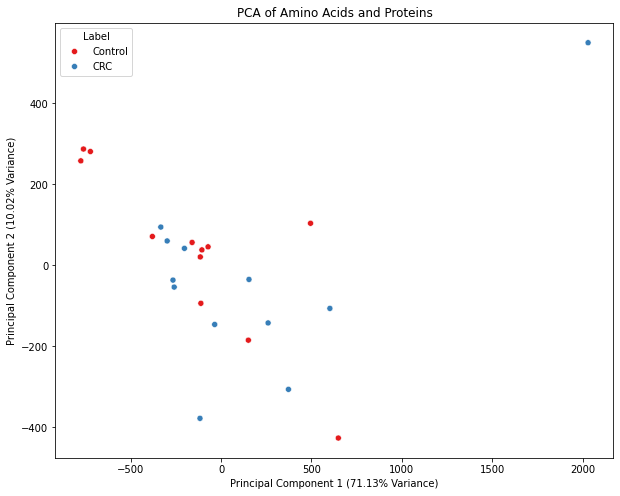

Explained variance by each component: [0.71134332 0.10018724]


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and prepare data
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
target = df['Label']
df = df.drop(['Label'], axis=1)


# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Add target labels for coloring the plot
pca_df = pd.concat([pca_df, target], axis=1)

# Plot the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='Set1')
plt.title('PCA of Amino Acids and Proteins')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Label')
plt.show()

# Print explained variance ratio
print(f'Explained variance by each component: {pca.explained_variance_ratio_}')


### PCA on data With Scaling using MinMaxScaler

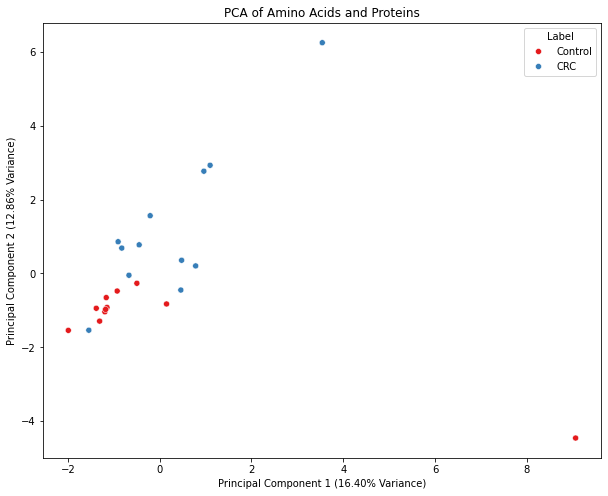

Explained variance by each component: [0.16403655 0.12862571]


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and prepare data
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)
target = df['Label']
df = df.drop(['Label'], axis=1)
df_amino = df.iloc[:, 0:21]
df_prot = df.iloc[:, 21:]

# Scaling using MinMaxScaler
scaler = MinMaxScaler()
df_amino_scaled = pd.DataFrame(scaler.fit_transform(df_amino), columns=df_amino.columns, index=df.index)
df_prot_scaled = pd.DataFrame(scaler.fit_transform(df_prot), columns=df_prot.columns, index=df.index)

# Combine scaled data
df_combined = pd.concat([df_amino_scaled, df_prot_scaled], axis=1)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(df_combined)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df_combined.index)

# Add target labels for coloring the plot
pca_df = pd.concat([pca_df, target], axis=1)

# Plot the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='Set1')
plt.title('PCA of Amino Acids and Proteins')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Label')
plt.show()

# Print explained variance ratio
print(f'Explained variance by each component: {pca.explained_variance_ratio_}')
